In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('pfm_train.csv')
X = df.drop('Attrition', axis=1)

In [10]:
#可排序的类标转码
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
X['Gender']=class_le.fit_transform(X[['Gender']].values.ravel())
X['MaritalStatus']=class_le.fit_transform(X[['MaritalStatus']].values.ravel())
X['Over18']=class_le.fit_transform(X[['Over18']].values.ravel())
X['OverTime']=class_le.fit_transform(X[['OverTime']].values.ravel())

In [11]:
#不可排序的独热编码
X = pd.merge(X,pd.get_dummies(X[['BusinessTravel','Department','EducationField','JobRole']]),how='outer',left_index=True,right_index=True)
X = X.drop(['BusinessTravel','Department','EducationField','JobRole'],axis=1)

In [16]:
X_train = X
y = df['Attrition']
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
len(X_train.columns.values)

47

In [19]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe_lr = Pipeline([('scl',StandardScaler()),
                    ('clf',LogisticRegression(penalty='l2',C=0.1,random_state=1))])
pipe_lr.fit(X_train,y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

from sklearn.cross_validation import cross_val_score,StratifiedKFold
kfold = StratifiedKFold(y=y_train,n_folds=10,random_state=1)
scores=cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=-1)
print('%.3f+/-%.3f' % (np.mean(scores),np.std(scores)))

Test Accuracy: 0.914
0.873+/-0.025


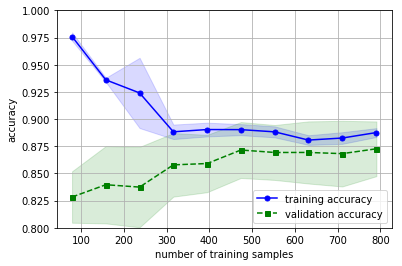

In [20]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import validation_curve,learning_curve
param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
train_sizes, train_scores,test_scores=learning_curve(estimator=pipe_lr,
                                                     X=X_train,
                                                     y=y_train,
                                                     train_sizes=np.linspace(0.1,1.0,10),
                                                     cv=10,n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

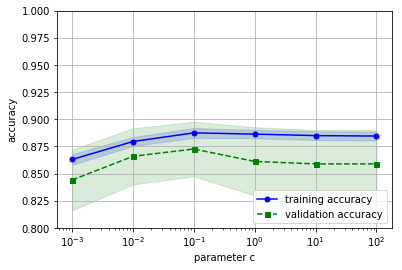

In [21]:
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
train_scores,test_scores = validation_curve(estimator = pipe_lr,
                                            X=X_train,
                                            y=y_train,
                                            param_name='clf__C',
                                            param_range=param_range,
                                            cv=10)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('parameter c')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

In [22]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl',StandardScaler()),('clf',SVC(random_state=1))])
print('111')
param_range_svc = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid_svc = [{'clf__C':param_range_svc,'clf__kernel':['linear']},
                 {'clf__C':param_range_svc,'clf__gamma':param_range_svc,'clf__kernel':['rbf']}]
print('222')
gs_svc = GridSearchCV(estimator=pipe_svc,
                     param_grid=param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=1)
print('333')
gs_svc=gs_svc.fit(X_train,y_train)
print('444')
print(gs_svc.best_score_)
print(gs_svc.best_params_)

111
222
333
444
0.8727272727272727
{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
